In [153]:
from utility import *
from scipy.constants import c
import datetime

# Einlesen der Daten

In [12]:
rng = 7000
rng_t = 3000
mitte = [load_counts('../messungen/kalib/mitte/Cal_2020-01-10_09-24-T.txt')[0:rng_t],
load_counts('../messungen/kalib/mitte/Cal_2020-01-10_09-24-EdetA.txt')[0:rng],
load_counts('../messungen/kalib/mitte/Cal_2020-01-10_09-24-EdetB.txt')[0:rng]]
rechts = load_counts('../messungen/kalib/rechts_b/Cal_2020-01-10_10-04-T.txt')[0:rng_t]
links = load_counts('../messungen/kalib/links_a/Cal_2020-01-10_09-45-T.txt')[0:rng_t]

In [13]:
channels_t = np.arange(1, mitte[0].size + 1)
channels_e = np.arange(1, mitte[1].size + 1)
energies_a = energy_a(channels_e)
energies_b = energy_b(channels_e)


# Plot ueber Energie

In [22]:
range_t = np.array([970, 1140])

In [15]:
range_b = np.array([1600, 2300])
range_a = np.array([2800, 3600])
e_range_a = energy_a(range_a)
e_range_b = energy_b(range_b)

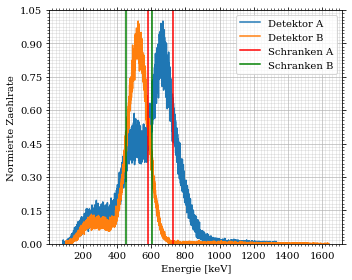

In [16]:
%matplotlib inline
fig, ax = set_up_plot()
ax.set_xlabel('Energie [keV]')
ax.set_ylabel('Normierte Zaehlrate')

ax.step(energies_a, mitte[1]/mitte[1].max(), label='Detektor A')
ax.step(energies_b, mitte[2]/mitte[2].max(), label='Detektor B')
ax.axvline(e_range_a[0], color='red')
ax.axvline(e_range_a[1], color='red',  label='Schranken A')
ax.axvline(e_range_b[0], color='green')
ax.axvline(e_range_b[1], color='green',  label='Schranken B')
ax.legend()
ax.set_ylim(0)
save_fig(fig, 'mid_over_energy', 'calibration')

# Plot ueber Energie

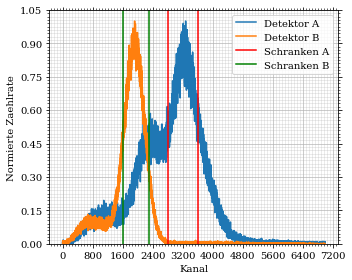

In [17]:
%matplotlib qt5
fig, ax = set_up_plot()
ax.set_xlabel('Kanal')
ax.set_ylabel('Normierte Zaehlrate')

ax.step(channels_e, mitte[1]/mitte[1].max(), label='Detektor A')
ax.step(channels_e, mitte[2]/mitte[2].max(), label='Detektor B')
ax.axvline(range_a[0], color='red')
ax.axvline(range_a[1], color='red',  label='Schranken A')
ax.axvline(range_b[0], color='green')
ax.axvline(range_b[1], color='green',  label='Schranken B')
ax.legend()
ax.set_ylim(0)
save_fig(fig, 'mid_over_channel', 'calibration')

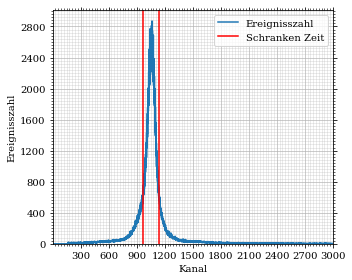

In [18]:
fig, ax = plot_spectrum(mitte[0], label='Ereignisszahl')
ax.axvline(range_t[0], color='red')
ax.axvline(range_t[1], color='red',  label='Schranken Zeit')
ax.legend()
save_fig(fig, 'time_range', 'calibration')

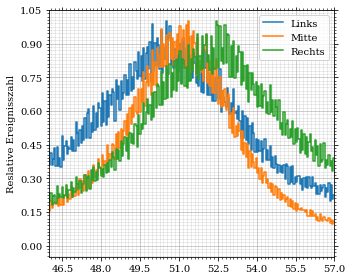

In [19]:
%matplotlib inline
times = channel_to_time(channels_t)[0]
fig, ax = set_up_plot() #plot_spectrum(links/links.max(), label='Links')
ax.step(times, links/links.max(), label='Links')
ax.step(times, mitte[0]/mitte[0].max(), label='Mitte')
ax.step(times, rechts/rechts.max(), label='Rechts')
ax.legend()
ax.set_ylabel('Reslative Ereignisszahl')
ax.set_xlim(46, 57)
save_fig(fig, 'all_times', 'calibration')



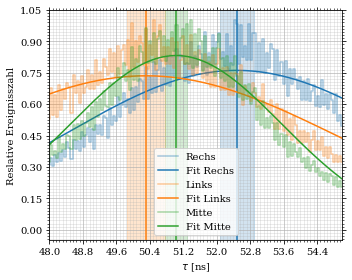

In [20]:
fig, ax = set_up_plot()
p_r, d_p_r = find_and_plot_peak(rechts, ax, 'Rechs')
p_l, d_p_l = find_and_plot_peak(links, ax, 'Links')
p_m, d_p_m = find_and_plot_peak(mitte[0], ax, 'Mitte')
ax.legend()
ax.set_ylabel('Reslative Ereignisszahl')
ax.set_xlabel(r'$\tau$ [ns]')
ax.set_xlim(48, 55)

save_fig(fig, 'lenght_det', 'calibration')

In [266]:
l, d_l = (p_r - p_l)/2*1e-6*c, 1/2*np.sqrt(d_p_r**2 + d_p_l**2)*1e-6*c

In [267]:
l, d_l

(326.08110436268794, 92.36759086635159)

In [147]:
((channel_to_time(rechts.argmax())[0] - channel_to_time(links.argmax())[0])*1e-9 * c)/2

0.28959951442799925

In [146]:
((channel_to_time(rechts.argmax())[0] - channel_to_time(mitte[0].argmax())[0])*1e-9 * c)

0.3185594658707989

In [21]:
((channel_to_time(mitte[0].argmax())[0] - channel_to_time(links.argmax())[0])*1e-9 * c)

0.2606395629852018

# Koinzidenzaufloesung

In [247]:
t, dt = channel_to_time(range_t)  # ns
t, dt = t*1e-9, dt*1e-9  # s
tau = t[1] - t[0], np.sqrt(np.sum(dt**2))  # s

In [248]:
tau, d_tau

((8.211000000000006e-09, 4.040589313454165e-11), 2.979973322028236e-11)

In [249]:
A = (54e-3)**2  # m^2
d_max = 386e-3  # m
date_0 = datetime.datetime(2014, 1, 10)
date_1 = datetime.datetime(2020, 10, 1)
A0 = SecondaryValue('A*(1/2)**(-t/hl)')(A=(1.36e6, 1.36e6*3e-2), t=(date_1 - date_0).total_seconds(), hl=82.1e6)
P = .90382, 0.0602
T = 10*60 + 47, 2 # s
omega = A/(d_max**2)

In [250]:
(date_1 - date_0).total_seconds()

212198400.0

In [251]:
counts = np.sum(mitte[0][range_t[0] - 1:range_t[1] - 1])
counts = counts, np.sqrt(counts)

In [252]:
rate = SecondaryValue('counts/T')(counts=counts, T=T)

In [253]:
rate

(422.7496136012365, 1.5365950819791954)

In [254]:
rand_rate = SecondaryValue('4*tau*A*omega/(2*pi)*counts/T')\
    (tau=tau,
     A=A0, omega=omega, counts=counts, T=T, pi=np.pi)

In [255]:
rate[0]

422.7496136012365

In [256]:
range_t[0] - 1

969

In [257]:
rand_rate

(0.35282827909085285, 0.01080269632280018)

In [263]:
rand_rate

(0.35282827909085285, 0.01080269632280018)

# Effektivitaet

In [268]:
effectivity = SecondaryValue('rate/(A*omega/(2*pi)*P)')(P=P, A=A0, rate=rate, omega=omega, pi=np.pi)

In [269]:
effectivity

(0.018406751465434315, 0.0013462868493623811)

In [266]:
A0[1]

244744.15933688084

In [267]:
rate

(422.7496136012365, 1.5365950819791954)